In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
folder = 'PS_1k_5k_10k_PEG_in_agarose'
bucket = 'dtoghani.data'
experiment = '100nm_1k_PEG_2' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)
    
    #Don't use
    #geoM2xy[sample_name] = np.exp(geoM2xy[sample_name])
    #gSEM[sample_name] = np.exp(gSEM[sample_name])

In [3]:
gSEM

{'100nm_1k_PEG_2_XY01': array([ 0.        ,  0.00913428,  0.01156413,  0.01351038,  0.01506939,
         0.01632731,  0.01738592,  0.0182636 ,  0.01900641,  0.01964852,
         0.02026629,  0.02091834,  0.02149941,  0.02212687,  0.02270879,
         0.02363781,  0.02479807,  0.02616464,  0.02708144,  0.02848582,
         0.02953056,  0.0305795 ,  0.03151467,  0.03259746,  0.03393344,
         0.03506568,  0.03622523,  0.03732708,  0.03860164,  0.03950967,
         0.04107694,  0.04229398,  0.04322805,  0.04444832,  0.04584941,
         0.04688526,  0.0480984 ,  0.04904901,  0.04978577,  0.05157272,
         0.05236004,  0.05407778,  0.0545435 ,  0.05589241,  0.05802921,
         0.0580154 ,  0.05952426,  0.06037838,  0.06196403,  0.06222293,
         0.06331908,  0.06454281,  0.0658536 ,  0.0670729 ,  0.0679199 ,
         0.06959904,  0.06997135,  0.07125281,  0.07278142,  0.07320754,
         0.07516732,  0.07552235,  0.07629447,  0.07716047,  0.07890511,
         0.08045446,  0.0818

In [4]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key],
                                                            bucket=bucket, folder=folder, experiment=key) 

for key in geo_slices:
    geo_slices[key][geo_slices[key]==0.0] = np.nan
    gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
    geo_slices[key] = ma.masked_invalid(geo_slices[key])
    gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(well_names, gSEM_slices)
geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:586: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:631: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:633: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])


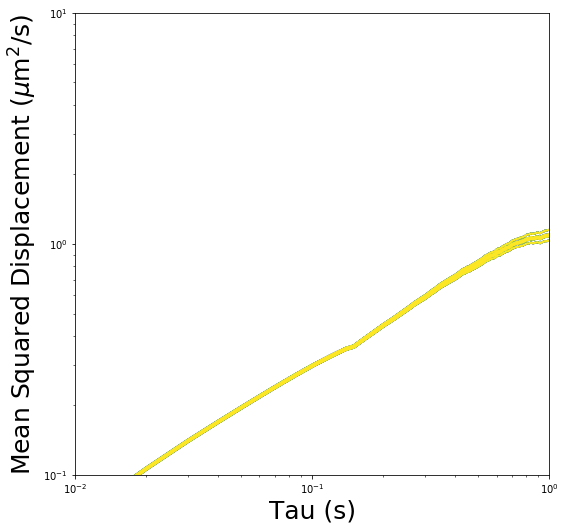

In [5]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, exponential=True)

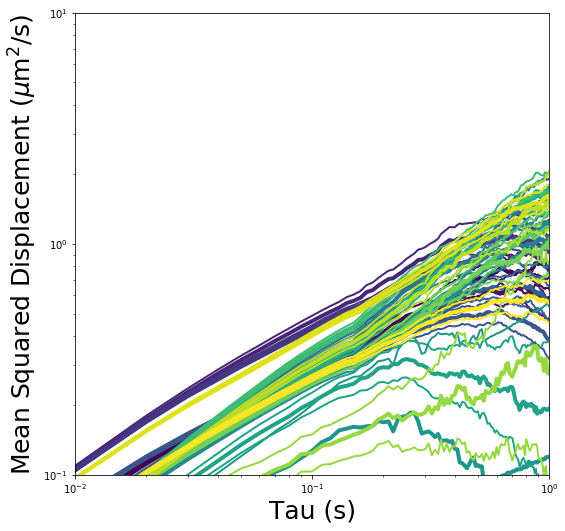

In [6]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder, exponential=True)

In [ ]:
to_plot = []
for key in geo_slices:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder, exponential=True)

In [ ]:
gh['100nm_5k_PEG_W0']